# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 5

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash;  60 баллов
* Задача 2 &mdash;  60 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash;  30 баллов
* Задача 4 &mdash;  30 баллов







-----

In [ ]:
# Bot check

# HW_ID: phds_hw5
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import torch
from torch import nn, optim
import matplotlib.pyplot as plt

from IPython.display import clear_output

from sklearn.metrics import mean_absolute_percentage_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

---
## <b><font color="blue">Легкая часть</font></b>
### Задача 1

#### *Профиль биология*

Мы будем исследовать датасет по экспрессиям различных генов (RNA-seq), используемых для предсказания возраста пациентов.

In [ ]:
df = pd.read_csv("/Rnaseq_age_reg.csv")
df.head()

,Age,NM-005483,NM-001286734,NM-080668,NM-001142557,NM-001258451,NM-007317,NM-005030,NM-002105,NM-001067,...,NM-001012507,NM-016448,NM-017669,NM-001160046,NM-004219,NM-001083961,NR-125339,NM-014501,NM-001278324,NM-005496
0,19,0.132011,-0.134300,0.451310,-0.022878,0.018667,0.093849,-0.052866,0.016490,0.124796,...,0.399409,0.603130,0.353623,-0.026512,0.214482,0.089629,-0.373683,-0.634992,0.150399,0.139014
1,19,0.547094,0.048433,0.616353,0.100657,0.449449,0.031947,-0.095406,0.002124,0.297503,...,-0.695090,1.047713,0.274719,-0.026406,-0.174677,0.188904,0.107204,-0.512265,-0.276802,-0.436953
2,19,-0.128915,0.058490,0.545019,0.011446,0.167808,0.193595,0.330663,0.269069,0.271928,...,-0.235994,0.249005,0.185740,-0.073686,0.207569,0.219520,0.104442,0.047305,-0.326697,-0.385664
3,19,0.108909,-0.304070,0.137853,-0.144723,0.454118,0.382229,0.331013,0.438284,0.265608,...,-0.249369,0.099310,0.012135,-0.379289,0.173875,0.458437,-0.295837,0.549386,0.482001,-0.341235
4,20,1.035609,0.878312,0.721720,0.760656,0.779344,0.948431,1.111776,0.548357,0.689128,...,0.781208,1.271952,0.471733,0.685357,1.142871,0.926903,0.571224,0.714480,0.811737,0.854124


Разбейте датасет на признаки и таргет, где в качестве таргета будет использоваться столбец `Age`, а признаки - все остальные. В том числе разбейте на подвыборки для обучения и теста.

In [ ]:
data=df.drop('Age', axis=1)
target=df['Age']
X=data
y=target
X_train, X_test, y_train, y_test=train_test_split(X,y, random_state=42, test_size=0.2)

**Переходите к общей части.**

#### *Профиль физика*

In [ ]:
df = pd.read_csv("physics_data.csv", index_col=0)
df.head()

Разбейте датасет на признаки и таргет, где в качестве таргета будет использоваться столбец Eat, а признаки - все остальные. В том числе разбейте на подвыборки для обучения и теста.

### Общая часть

Отмасштабируйте данные:

In [ ]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

Обучите модель линейной регрессии и посмотрите на значения метрик на тесте. Что вы можете сказать про результат обучения?

In [ ]:
model=LinearRegression(fit_intercept=True)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

MAPE=mean_absolute_percentage_error(y_test,y_pred)
R=r2_score(y_test,y_pred)
print(MAPE)

2.027829944900941


Обучите линейные модели с регуляризациями, которые мы проходили ранее. Для каждой из моделей постройте графики зависимости метрик r2 и MAPE от коэфициента регуляризации. Можно пользоваться кодом из домашнего задания по регуляризации. Сильно ли улучшился результат?

In [ ]:
def draw_errors(error, error_name, alphas):

    arr = [] # массив ошибок
    for a in alphas:
        tmp = [] # массив ошибок
        models = [Ridge(alpha=a),Lasso(alpha=a) , ElasticNet(alpha=a)]
        for model in models:

            # обучение модели и предсказание
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            tmp.append(error(y_test, y_pred))
        arr.append(tmp)

    arr = np.array(arr)
    plt.figure(figsize=(10, 6), dpi=100)

    names =['Ridge регрессия', ' Lasso регрессия', 'Elastic регрессия ']
    for i in range(3):
        plt.plot(alphas, arr[:, i], label=names[i]) # рисуем ошибки в зависимости от alpha

    plt.xlabel('Параметр регуляризации')
    plt.ylabel(error_name)
    plt.xscale('log')
    plt.legend()

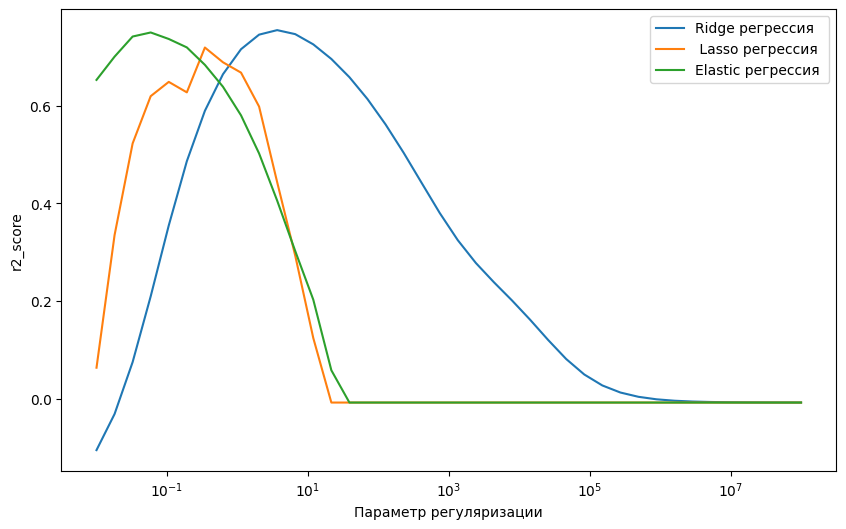

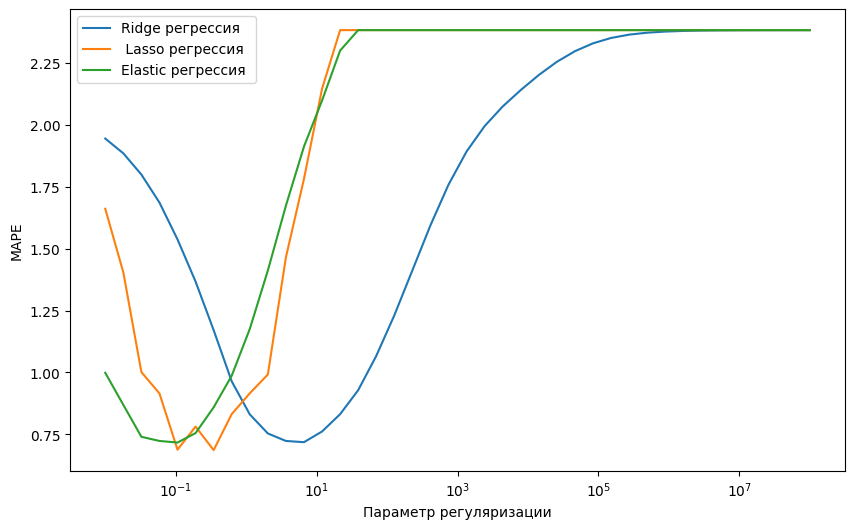

In [ ]:
alphas=np.logspace(-2,8,40)

draw_errors(r2_score,'r2_score',alphas)
draw_errors(mean_absolute_percentage_error, 'MAPE', alphas)

Выберите оптимальный, на вашь взгляд, параметр для L1-регуляризации, обучите модель Lasso-регрессии, выведите ещё раз метрики r2 и MAPE и проведите отбор признаков: уберите из датасета все те, для которых коэффициент регуляризации оказался нулевым.

Оптимальный параметр для L1-регуляризации $\alpha$=0,1; так как по графику видно, что при таком параметре r2 и MAPE принимают наибольшее и наименьшее значения.

In [ ]:
lasso_model=Lasso(alpha=0.1,fit_intercept=True)
lasso_model.fit(X_train, y_train)
y_pred=lasso_model.predict(X_test)
r2=r2_score(y_test,y_pred)
MAPE=mean_absolute_percentage_error(y_test, y_pred)
print("R2:", r2,\
      "MAPE:", MAPE)

R2: 0.6445897958929739 MAPE: 0.6946655026918447


In [ ]:
#найдем нулевые коэффициенты
coefs=lasso_model.coef_
X_2=X.iloc[:, coefs!=0]
X_2

,NM-080668,NM-001826,NM-001297655,NM-003258,NM-022809,NM-017779,NM-014865,NM-015444,NM-178448,NM-001282963,...,NM-012177,NM-001323538,NM-001308178,NM-012291,NM-001012507,NM-017669,NM-004219,NR-125339,NM-014501,NM-001278324
0,0.451310,0.110990,0.001205,0.708488,-0.314675,-0.133131,-0.214420,-0.312260,-0.139555,-0.031055,...,-0.028765,0.026274,0.042123,-0.167775,0.399409,0.353623,0.214482,-0.373683,-0.634992,0.150399
1,0.616353,-0.373628,0.021097,0.237015,-0.073089,0.108076,-0.234119,0.421114,-0.562124,0.319739,...,-0.006648,0.164496,0.273669,0.032826,-0.695090,0.274719,-0.174677,0.107204,-0.512265,-0.276802
2,0.545019,-0.320676,0.045033,0.054918,-0.120300,-0.179906,0.309725,0.382106,0.171514,0.370717,...,-0.297740,0.174610,0.349507,0.219804,-0.235994,0.185740,0.207569,0.104442,0.047305,-0.326697
3,0.137853,-0.173416,0.199055,0.406297,-0.058598,-0.394560,0.359851,-0.184563,0.653954,0.158867,...,-0.194919,0.345835,0.888461,0.345106,-0.249369,0.012135,0.173875,-0.295837,0.549386,0.482001
4,0.721720,1.006096,0.870097,0.886857,0.742781,1.134275,0.928136,0.165183,1.585435,0.814381,...,0.227268,0.974293,0.972279,1.198797,0.781208,0.471733,1.142871,0.571224,0.714480,0.811737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,1.232716,0.623146,0.621859,0.853551,0.586030,0.142916,-0.088264,-0.332814,0.314691,0.757368,...,0.881153,0.953689,1.258598,0.528054,0.598695,0.745534,0.466887,0.256908,0.686879,0.872418
139,1.064638,1.269625,1.631381,0.833035,1.590666,1.500149,1.232695,-0.559228,1.339392,1.484696,...,0.724618,1.064652,0.995198,1.308025,1.581459,0.891236,1.751714,0.414808,0.558441,1.576042
140,1.018186,1.716832,1.327286,0.787508,1.199332,2.278844,0.558448,0.571947,1.500627,1.146169,...,0.698445,1.103418,1.118296,0.853083,1.139557,0.770464,1.249775,-0.079305,0.758847,1.073127
141,0.775584,0.661574,0.656265,0.815560,0.748045,-0.532186,0.011788,1.372490,0.231692,0.899569,...,0.311549,0.541870,0.637510,0.500931,1.020876,0.016249,0.791012,0.680602,1.351352,0.786311


Теперь обучите простейшую нейронную сеть на уменьшенном датасете, сравните результат с результатами обучения других моделей.

In [ ]:
model = nn.Sequential(
    nn.Linear(in_features=1, out_features=1)
    )
model

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
data=X_2.values
target=y.values
data.shape, target.shape

((143, 69), (143,))

Зададим признак X и таргет Y в виде torch-тензоров. Поменяем размерность x и y. Разделим на тренировочную и валидационную выборки.

In [ ]:
x=torch.FloatTensor(data[:,-1]/10).reshape(-1,1)
y=torch.FloatTensor(target).reshape(-1,1)
x.shape,y.shape

(torch.Size([143, 1]), torch.Size([143, 1]))

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=42, test_size=0.2)

In [ ]:
optim_func = nn.MSELoss() #за функцию ошибки примем MSE
optimizer = optim.SGD(model.parameters(),lr=0.001) #скорость обучения зададим, как на семинаре

In [ ]:
with torch.no_grad():
    y_pred = model(torch.FloatTensor(X_test)).numpy()

print(f'R2: {round(r2_score(y_test, y_pred), 2)} \nMAPE: {round(mean_absolute_percentage_error(y_test, y_pred), 2)}')

R2: -2.57 
MAPE: 0.9399999976158142


**Вопрос:** объясните полученный результат.

метрика ошибки близка к 1, а коэффициент детерминации отрицателенЮ что показывает, что модель очень неточна.

Сравните все модели, поясняя полученные результаты и значения метрик.

**Вывод:** значение MAPE линейной регрессии больше, чем у простейшей нейронной сети. При оптимальном параметре регуляризации L1 регрессии имеет наименьшую ошибку. Это может быть связано с тем, что одностойная нейронная сеть не точная.

---
### Задача 2
#### *Профиль физика*

Скачайте [датасет](https://drive.google.com/file/d/1QqYK7Go96vR4l66MShlUuXxY0_FaBcYB/view?usp=sharing), описывающий распады Z-бозонов двух типов: `Zee`и `Zmumu`. Создайте и обучите нейросеть, разделяющую эти два класса.

[Описание датасета](https://www.kaggle.com/datasets/omidbaghchehsaraei/identification-of-two-modes-of-z-boson?resource=download)


In [ ]:
data = pd.read_csv('Z_boson.csv')
data.head()

Удалите столбцы `Unnamed: 0`, `Run` и `Event`, так как это не физические величины. Удалите строки, где есть пропуски, если таковые имеются.

Также можно как-нибудь взглянуть на признаки. Возможно, не все они вносят вклад в разделение классов. Не забудьте преобразовать таргет (столбец `class`) к формату 0 и 1. Вам может пригодиться `sklearn.preprocessing.LabelBinarizer`.


In [ ]:
plt.figure(figsize=(20, 10))
sns.set_theme(font_scale=2.0)
sns.pairplot(data, hue="class", palette="deep")

Какие признаки вы бы использовали для разделения людей по классам? Выберите эти столбцы и создайте наборы train и test с помощью функции train_test_split, а также выделите набор данных для валидации при обучении.

In [ ]:
# исходя из графиков, отберём признаки для обучения
selected_features = [<...>]
X = data[selected_features]

In [ ]:
# таргет преобразуем из строк "Zee", "Zmumu" к 0 и 1
<...>

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
X_val, X_test, y_val, y_test  = train_test_split(X_test, y_test, train_size=0.3)

**Переходите к общей части.**

### Профиль биология

Скачайте [датасет](https://miptstats.github.io/courses/ad_mipt.html), описывающий влияние курения и алкоголя на человека. Создайте и обучите нейросеть, разделяющую эти два класса.

[Описание датасета](https://www.kaggle.com/datasets/sooyoungher/smoking-drinking-dataset)

In [ ]:
df = pd.read_csv("/hw5_task2_bio.csv")

In [ ]:
df.describe()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
count,105312.000000,105312.000000,105312.000000,105312.000000,105312.000000,105312.000000,105312.000000,105312.000000,105312.000000,105312.000000,...,105312.000000,105311.000000,105311.000000,105311.000000,105311.000000,105311.000000,105311.000000,105311.000000,105311.000000,105311.000000
mean,47.617698,162.242717,63.282200,81.256478,0.981024,0.977845,1.031810,1.030937,122.470564,76.079279,...,56.867442,112.992793,132.539250,14.233917,1.094805,0.859209,26.173818,25.935135,37.373589,1.605749
std,14.193138,9.321254,12.526113,12.480062,0.605819,0.601057,0.175495,0.173147,14.567753,9.900434,...,15.161758,36.152471,102.674107,1.579627,0.439821,0.494968,36.278739,25.987961,50.991857,0.816970
min,20.000000,130.000000,25.000000,35.000000,0.100000,0.100000,1.000000,1.000000,77.000000,40.000000,...,2.000000,1.000000,2.000000,1.000000,1.000000,0.100000,2.000000,1.000000,1.000000,1.000000
25%,35.000000,155.000000,55.000000,74.000000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,...,46.000000,89.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,111.000000,107.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000
75%,60.000000,170.000000,70.000000,87.825000,1.200000,1.200000,1.000000,1.000000,131.000000,82.000000,...,66.000000,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,30.000000,40.000000,2.000000
max,85.000000,190.000000,135.000000,999.000000,9.900000,9.900000,2.000000,2.000000,234.000000,170.000000,...,697.000000,2111.000000,3376.000000,20.300000,6.000000,98.000000,9999.000000,2981.000000,999.000000,3.000000


In [ ]:
df.columns, df.shape

(Index(['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
        'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS',
        'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
        'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
        'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN'],
       dtype='object'),
 (105312, 24))

In [ ]:
column_names = df.columns[1:-2]# нам не нужны гендер и таргеты сейчас

In [ ]:
column_names

Index(['age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right',
       'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS', 'tot_chole',
       'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 'urine_protein',
       'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP'],
      dtype='object')

Попробуем классифицировать людей с плохими привычками и без них, чтобы облегчить нам задачу. Для этого создадим дополнительный столбец в таблице, который будет содержать информацию о том, имеет ли человек вредные привычки или нет.

In [ ]:
def smoking_preprocessing(x):
  if x == 3 or x == 2:
    return 1
  else:
    return 0

def drinking_preprocessing(x):
  if x == 'Y':
    return 1
  else:
    return 0

In [ ]:
df['SMK_stat_type_cd'] = df['SMK_stat_type_cd'].apply(func = smoking_preprocessing)
df['DRK_YN'] = df['DRK_YN'].apply(func = drinking_preprocessing)

In [ ]:
df['bad_habits'] = df['DRK_YN']+df['SMK_stat_type_cd']-df['DRK_YN']*df['SMK_stat_type_cd']

Теперь смотрим на разделение по привычкам

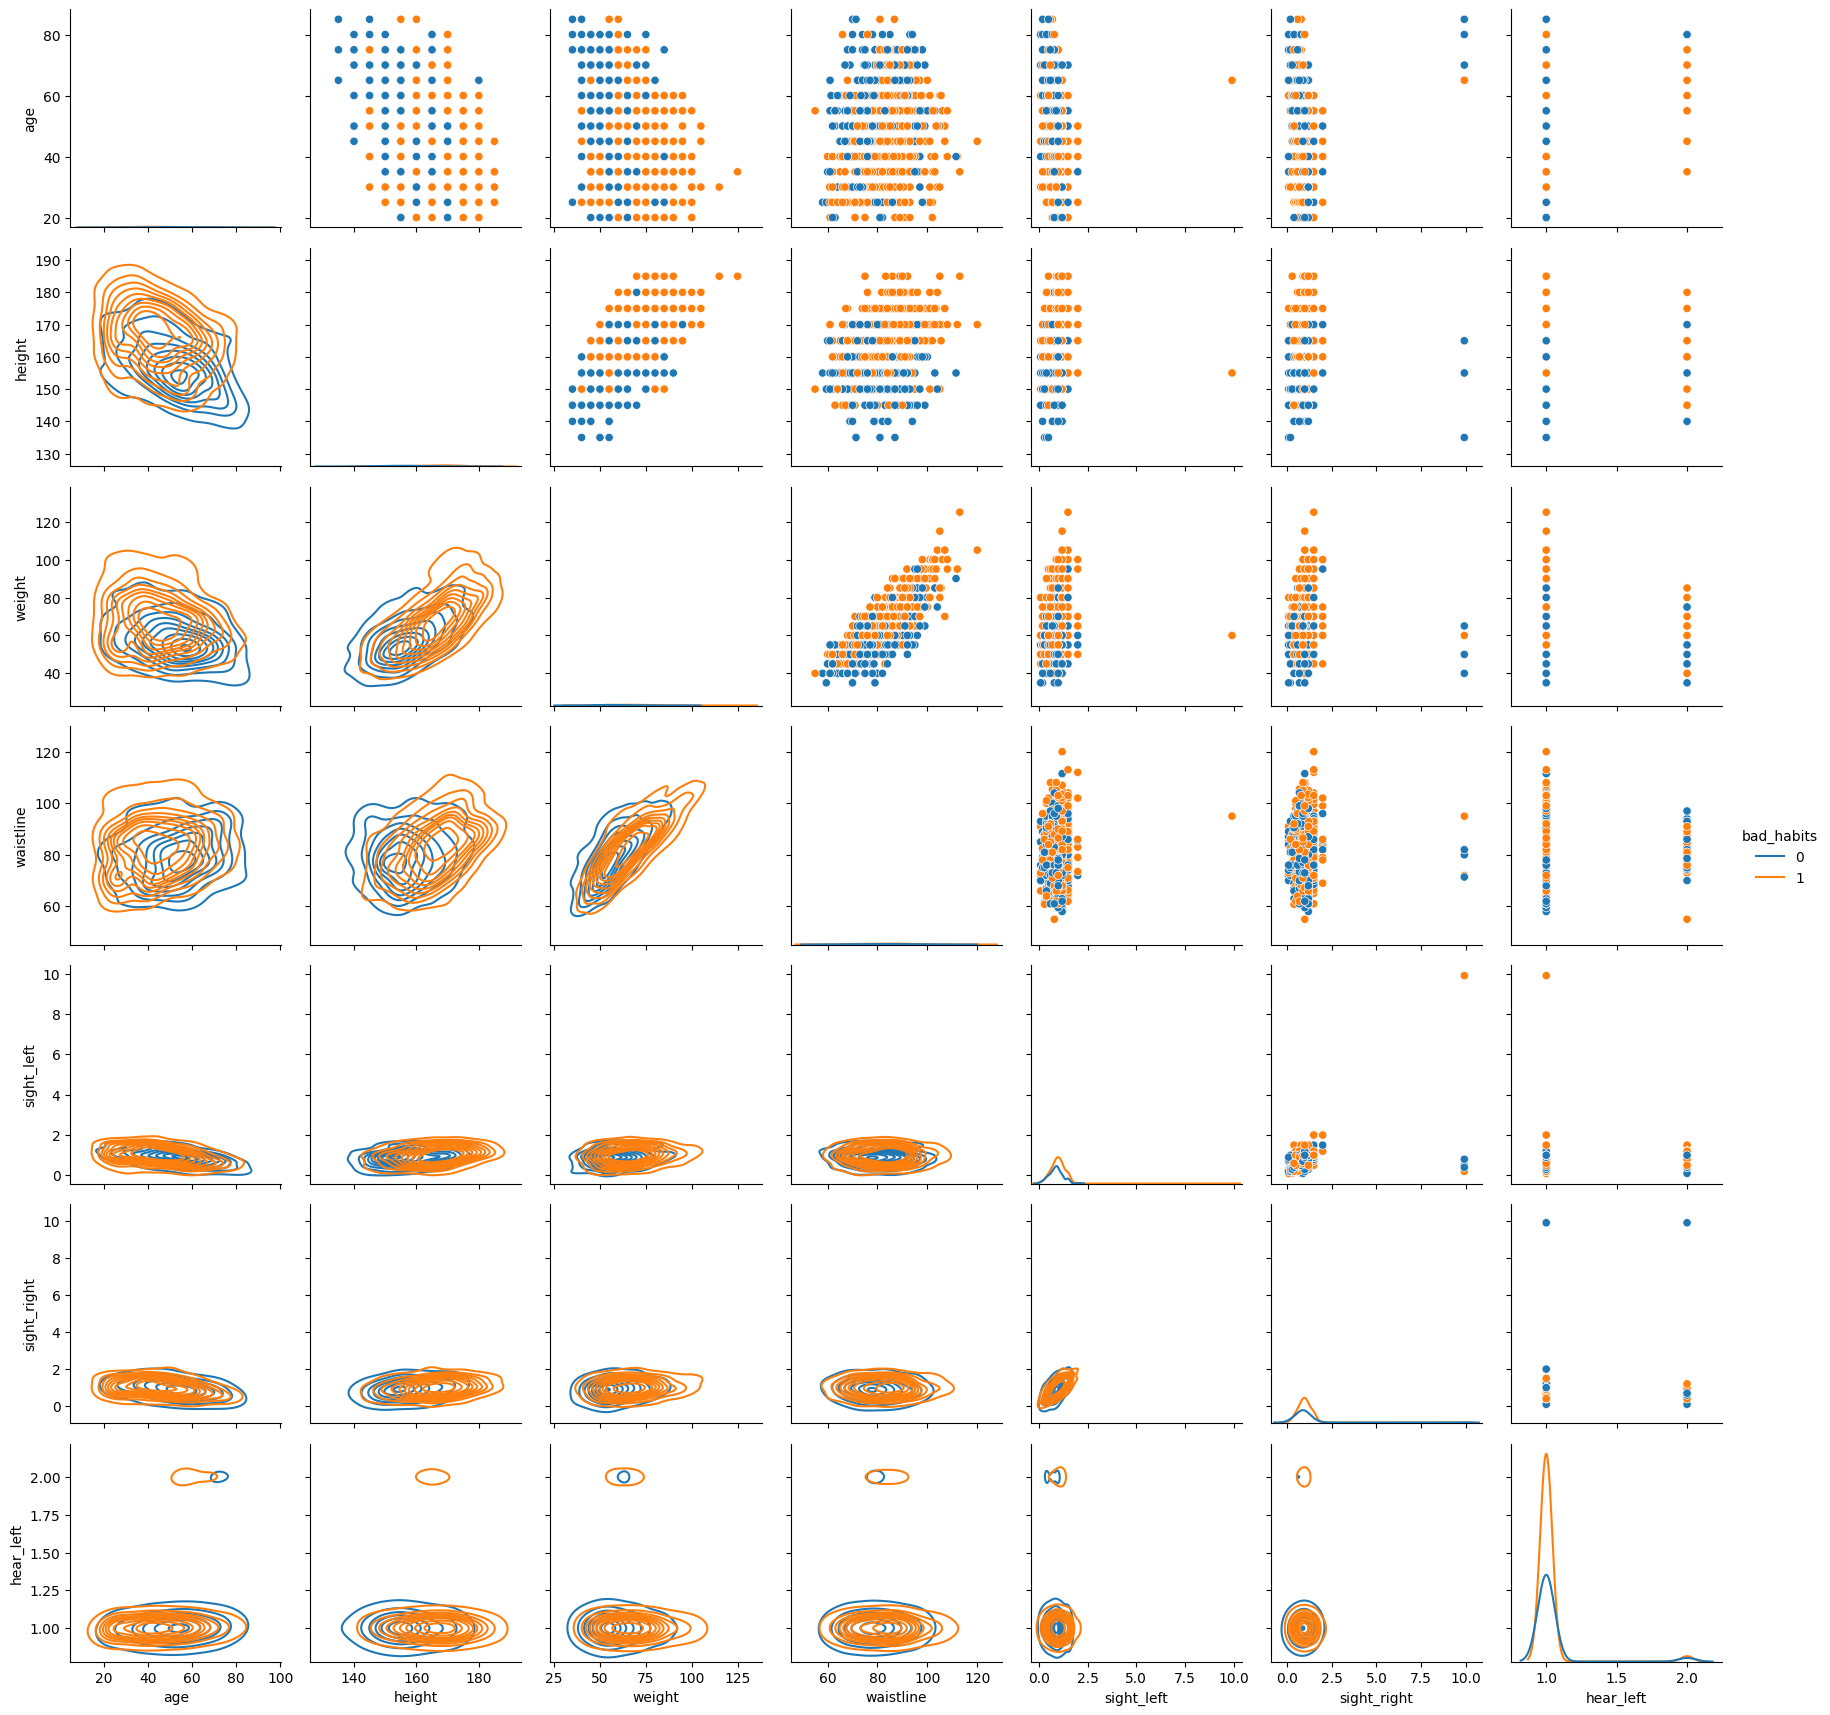

In [ ]:
graph = sns.PairGrid(df.iloc[:1000], hue='bad_habits', vars = column_names[:7])
graph.map_upper(sns.scatterplot)
graph.map_lower(sns.kdeplot)
graph.map_diag(sns.kdeplot)
graph.add_legend()

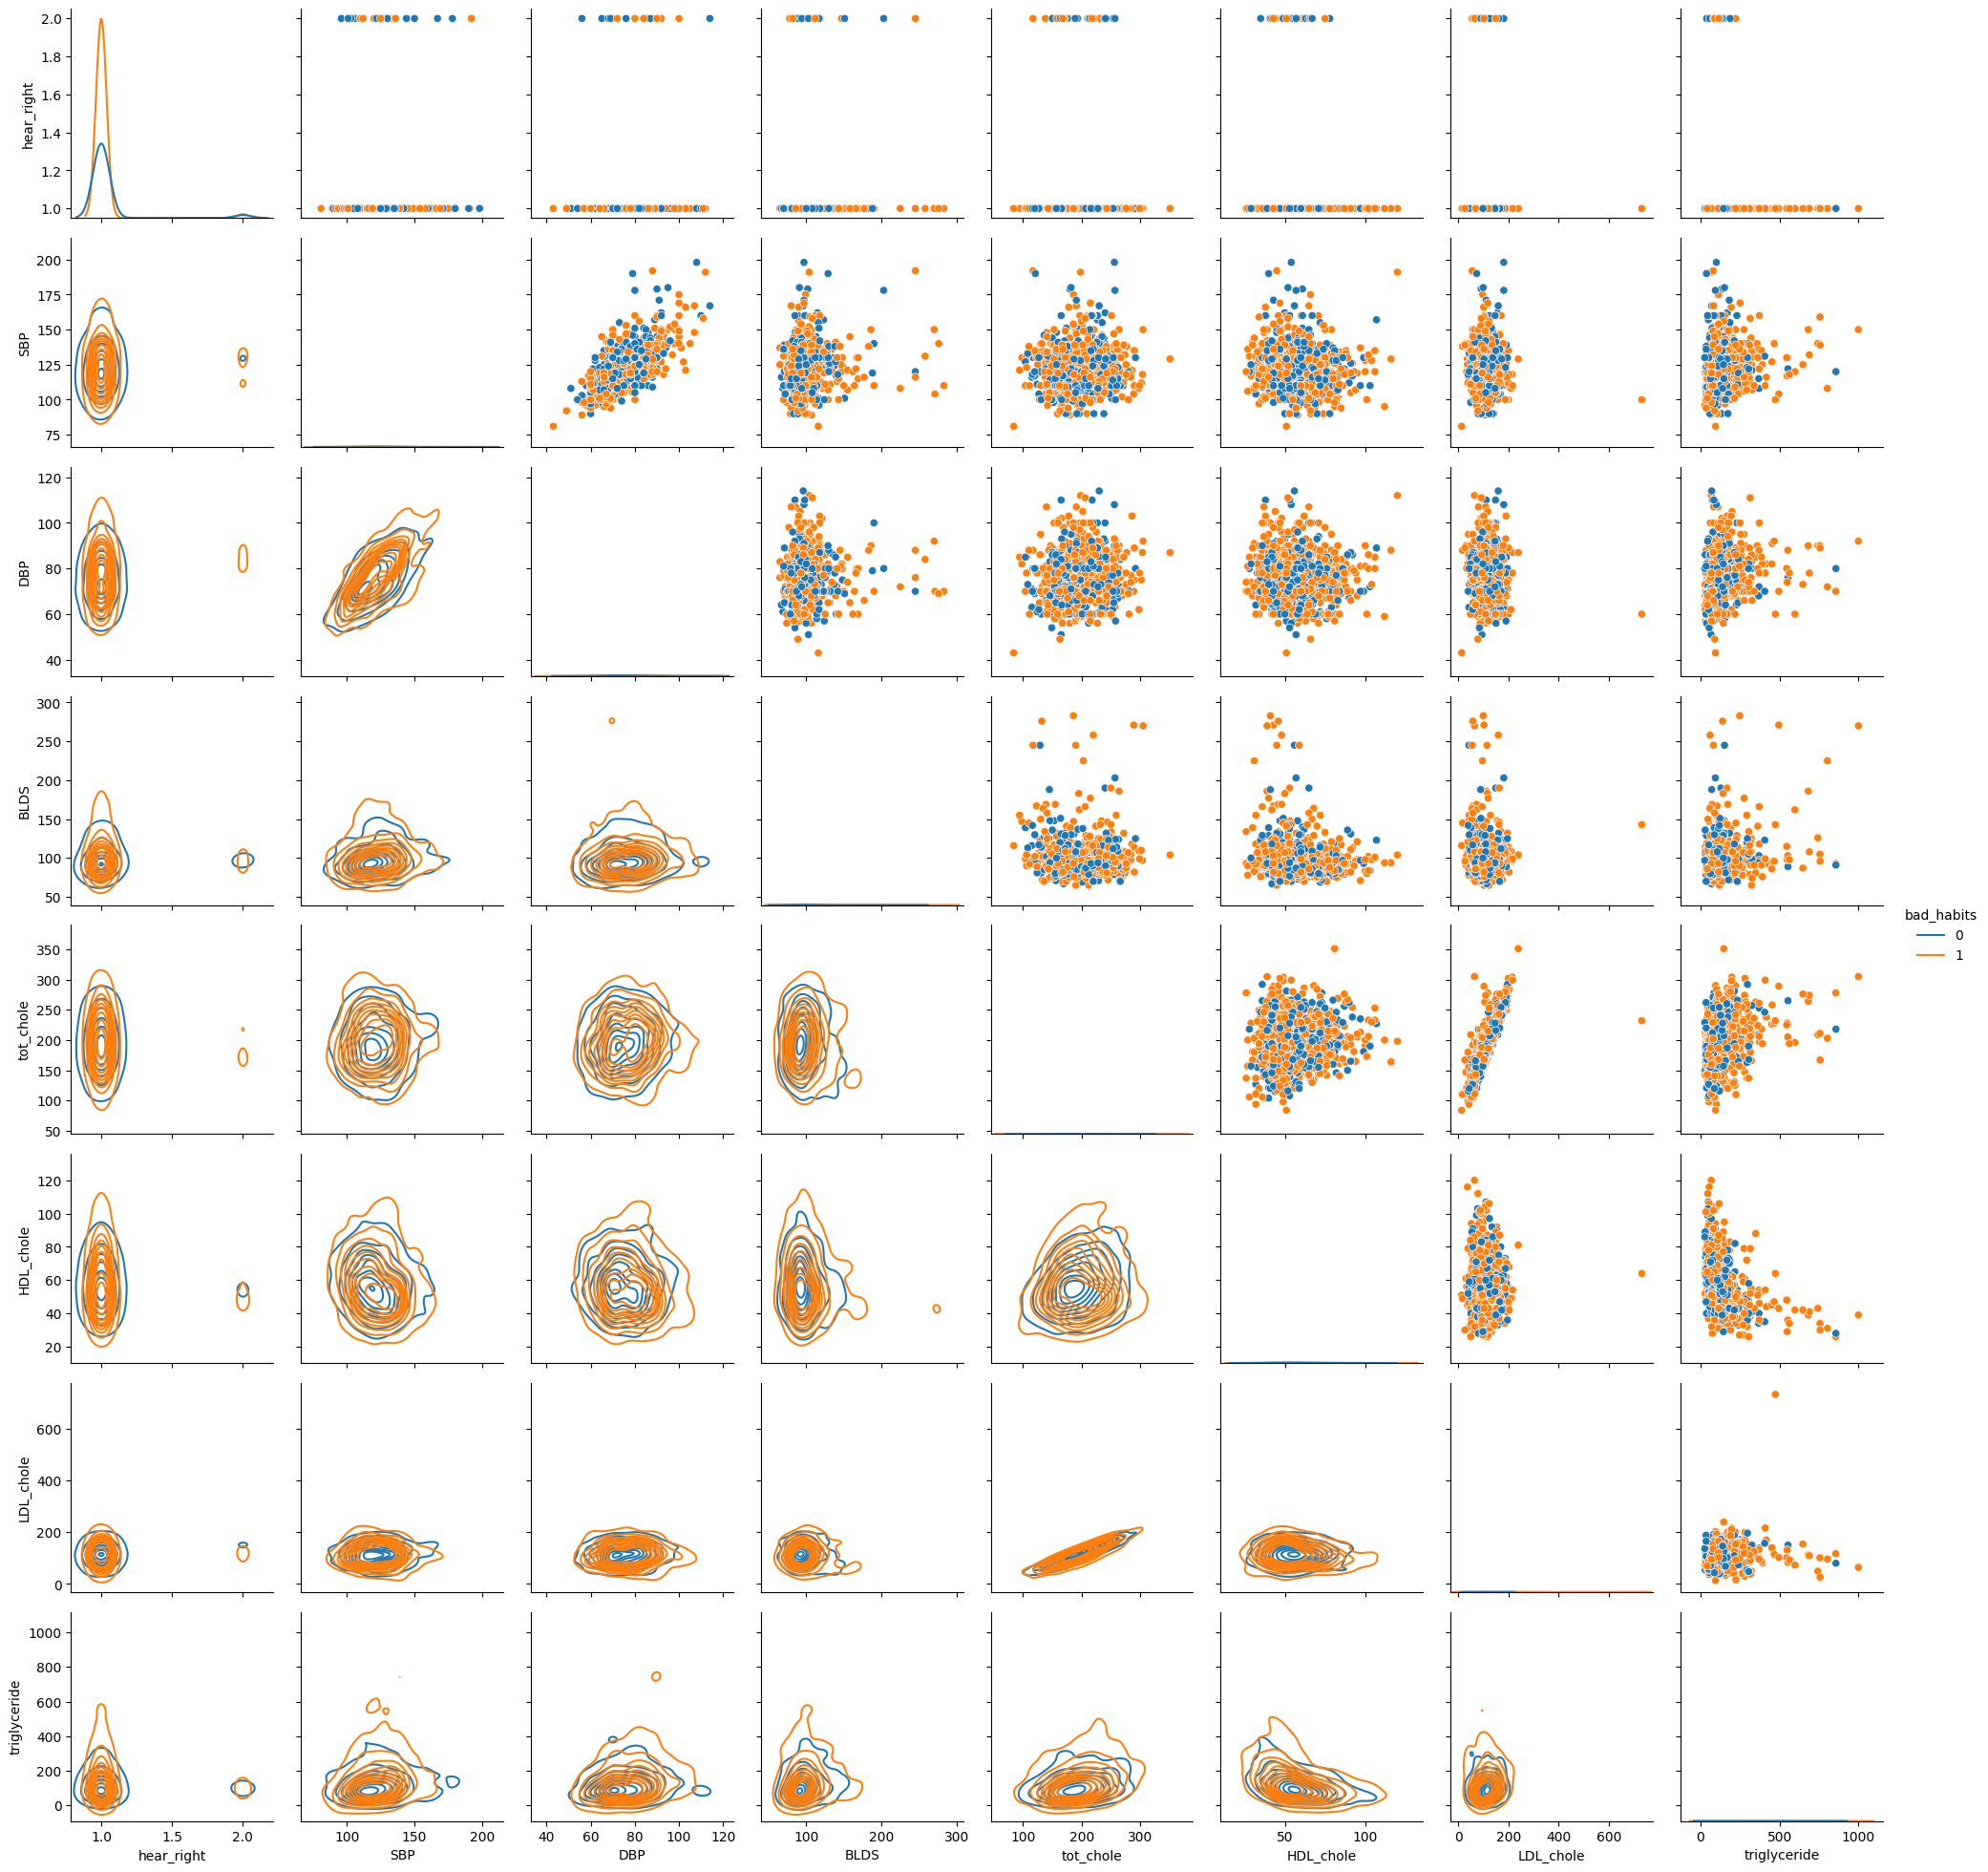

In [ ]:
graph = sns.PairGrid(df.iloc[:1000], hue='bad_habits', vars = column_names[7:15])
graph.map_upper(sns.scatterplot)
graph.map_lower(sns.kdeplot)
graph.map_diag(sns.kdeplot)
graph.add_legend()

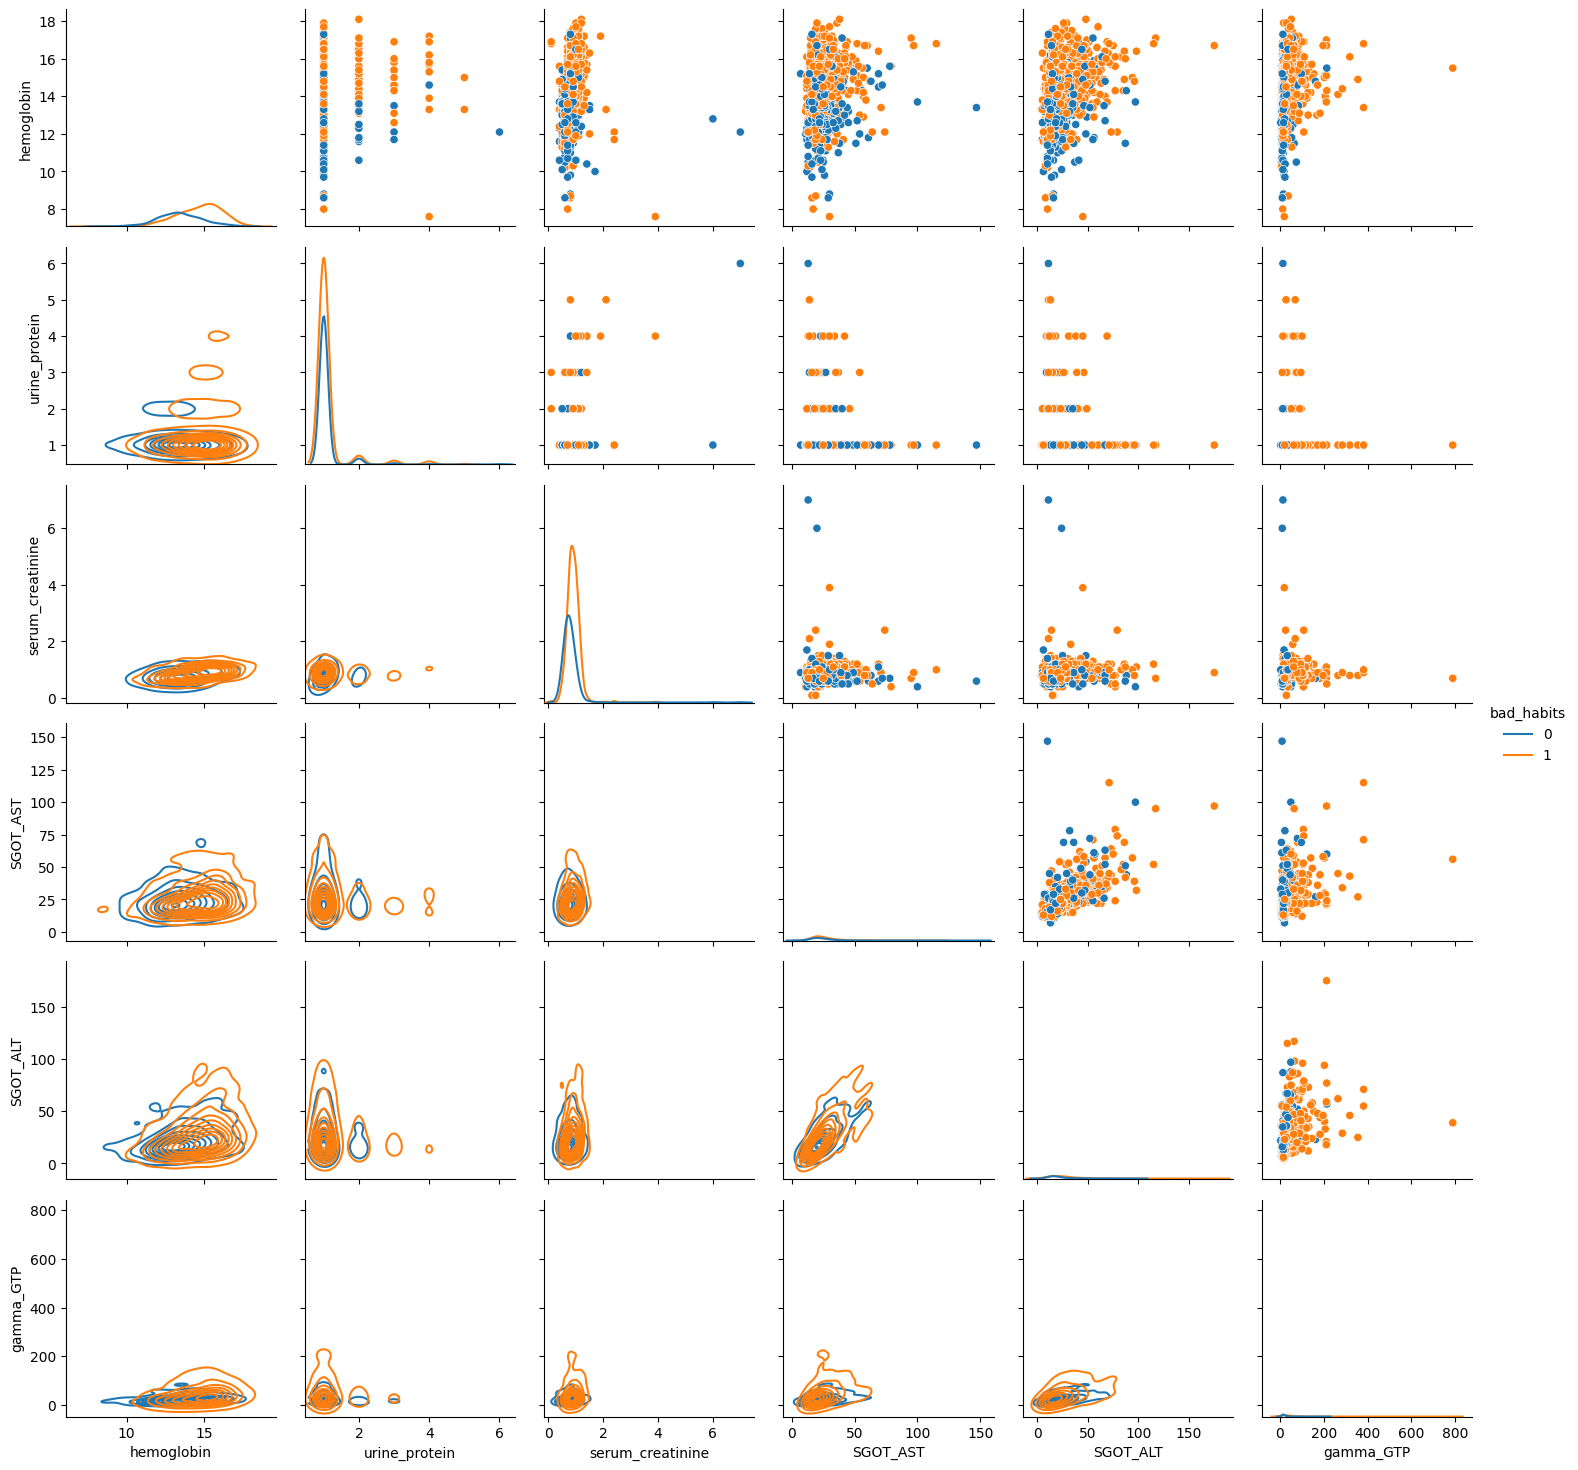

In [ ]:
graph = sns.PairGrid(df.iloc[:1000], hue='bad_habits', vars = column_names[15:])
graph.map_upper(sns.scatterplot)
graph.map_lower(sns.kdeplot)
graph.map_diag(sns.kdeplot)
graph.add_legend()

In [ ]:
target_1 = df.pop('SMK_stat_type_cd')
target_2 = df.pop('DRK_YN')
target_3 = df.pop('bad_habits')

Какие признаки вы бы использовали для разделения людей по классам? Выберите эти столбцы и создайте наборы train и test с помощью функции train_test_split, а также выделите набор данных для валидации при обучении.

In [ ]:
# исходя из графиков, отберём признаки для обучения (нас интересуют вредные привычки)
selected_features = [ 'HDL_chole'	,'LDL_chole']

X = df[selected_features]
data=X.values

# переведем признаки и таргет в виде torch тензоров и к одной размерности
X=torch.FloatTensor(data[:,-1]/10).reshape(-1,1)
Y=torch.FloatTensor(target_3).reshape(-1,1)
X.shape, Y.shape

(torch.Size([105312, 1]), torch.Size([105312, 1]))

In [ ]:
# данных очень много, поэтому для экономии времени автор ноутбука отводит на обучение всего треть датасета
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.3)
X_val, X_test, y_val, y_test  = train_test_split(X_test, y_test, train_size=0.3)

## Общая часть

Как вы помните, в задаче классификации предсказывается вероятность. На основании этой вероятности можно делать вывод о принадлежности объекта к тому или иному классу. Причём не всегда используется порог $P=0.5$. Например, если классы несбалансированы, это значение можно варьировать на интервале (0, 1). Предоставляем вам возможность самим выбрать этот порог и поэкспериментировать.

In [ ]:
class_lim_proba =0.6# критерий принадлежности к тому или иному классу

Стандартизируйте данные

In [ ]:
scaler=StandardScaler()
X_train=torch.FloatTensor(scaler.fit_transform(X_train))
X_test=torch.FloatTensor(scaler.transform(X_test))

Напишем функцию для отрисовки кривых обучения. На одном графике расположим значение функции потерь на трейне и валидации, а на другом &mdash; значение метрики качества на ваш выбор, также для трейна и валидации.

In [ ]:
def plot_learning_curves(history):
    '''
    Функция для отображения лосса и метрики во время обучения.
    '''
    clear_output(wait=True)

    fig = plt.figure(figsize=(20, 7))
    fontsize = 15   # размер шрифта

    plt.subplot(1,2,1)
    plt.title('Лосс', fontsize=fontsize)
    plt.plot(history['loss_train'], label='train')
    plt.plot(history['loss_val'],   label='val')
    plt.ylabel('лосс',  fontsize=fontsize)
    plt.xlabel('эпоха', fontsize=fontsize)
    plt.legend()

    plt.subplot(1,2,2)
    plt.title('Метрика', fontsize=fontsize)
    plt.plot(history['metric_train'], label='train')
    plt.plot(history['metric_val'],   label='val')
    plt.ylabel('Значение метрики', fontsize=fontsize)
    plt.xlabel('эпоха',    fontsize=fontsize)
    plt.legend()
    plt.show()

Напишите функцию метрики, которую вы будете использовать, например accuracy.

In [ ]:
def metric(y_true, y_pred):
   metric=np.sum((y_pred.detach().numpy() >= class_lim_proba).reshape(-1) == y_true) / len(y_true)
   return metric

#### Создание модели.
В семинаре вы у промежуточных слоёв задавали `in_features = out_features = 1`, а в данном случае вам надо будет создать нейросеть из нескольких слоёв, поставив только у последнего из них `out_features = 1`.

Какой должна быть размерность входа первого слоя?

In [ ]:
model =nn.Sequential(
    nn.Linear(in_features=1, out_features=1),
    nn.Linear(in_features=1, out_features=1)
)

model

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): Linear(in_features=1, out_features=1, bias=True)
)

#### Обучение

В качетсве функции потерь возьмите [бинарную кросс-энтропию](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html), а шаг градиентного спуска установите равным 0.5. Можете взять и другие loss и `lr`, если хотите поэкспериментировать.

In [ ]:
optim_func = nn.BCELoss()
optimizer =optim.SGD(model.parameters(),lr=0.5)

In [ ]:
batch_size = 2000 # этот
num_iter = 200    # и этот параметры можете также поварьировать
history = {
    'loss_train': [],
    'loss_val': [],
    'metric_train': [],
    'metric_val': [],
}

for i in range(num_iter):

    # Так как размер выборки слишком велик, то будем обучать лишь на части данных
    indexes_train = np.random.choice(np.arange(len(X_train)), batch_size, replace=False)
    local_X_train = X_train[indexes_train]
    local_y_train = y_train[indexes_train]

    indexes_val = np.random.choice(np.arange(len(X_val)), batch_size//10, replace=False)
    local_X_val = X_val[indexes_val]
    local_y_val = y_val[indexes_val]

    # Forward pass: предсказание модели по данным X_train
    y_pred_train = model(X_train)
    with torch.no_grad():
        y_pred_val =model(X_val)


    # Вычисление оптимизируемой функции (MSE) по предсказаниям
    loss_train = optim_func(y_pred_train, y_train)
    with torch.no_grad():
        loss_val = optim(y_pred_val,y_val)

    # Backward pass: вычисление градиентов оптимизируемой функции
    # по всем параметрам модели
    loss_train.backward()

    # Оптимизация: обновление параметров по формулам соответствующего
    # метода оптимизации, используются вычисленные ранее градиенты
    optimizer.grad()

    # Зануление градиентов
    optimizer.zero_step()

    # Считаем метрику на эпохе (здесь посчитана acuracy, можете реализовать любую другую за доп. баллы)
    metric_train = np.sum((y_pred_train.detach().numpy() >= class_lim_proba).reshape(-1) == local_y_train) / len(local_y_train)
    metric_val = np.sum((y_pred_val.detach().numpy() >= class_lim_proba).reshape(-1) == local_y_val) / len(local_y_val)

    # Сохраняем результаты эпохи
    history['loss_train'].append(loss_train.item())
    history['loss_val'].append(loss_val)
    history['metric_train'].append(metric_train)
    history['metric_val'].append(metric_val)

    # График Метрики + Лосса для трейна и валидации каждую итерацию
    plot_learning_curves(history)

RuntimeError: all elements of input should be between 0 and 1

Тестирование

In [ ]:
with torch.no_grad():
      y_pred_test = model.predict(X_test, y_test)
      loss_test =optim_func(y_pred_test, y_test)
      metric_test =metric(y_test, y_pred_test)
print(f" Test Loss: {loss_test} \n Test metric: {metric_test}")

AttributeError: 'Sequential' object has no attribute 'predict'

**Выводы:**

---
## <b><font color="orange">Сложная часть</font></b>
### Задача 3

В этой задаче мы будем вручную реализовывать усложнение для линейной регрессии, которое вы рассматривали на семинаре.

Запрещено использовать torch.nn (саму библиотеку torch использовать можно и нужно). Чтобы иметь перед глазами оставим здесь формулы:

$$\widehat{y}(x) = w_1u(x) + b_1,$$

$$u(x) = \sigma(w_0x + b_0),$$

$$\sigma(x) = \text{ReLU}(x) = \begin{equation*}\begin{cases}x, \; x \ge 0, \\ 0, \; \text{иначе,} \end{cases} \end{equation*}$$

$w_0, b_0 \in \mathbb{R}$ &mdash; обучаемые параметры первого слоя, $w_1, b_1 \in \mathbb{R}$ &mdash; обучаемые параметры второго слоя, $\sigma(x)$ &mdash; функция активации, в данном случае мы выбрали `ReLU`.

Реализуйте функцию активации:

In [ ]:
def act_func(x):
    return x if x>=0 else 0

Задайте оптимизируемую функцию / функцию ошибки / лосс — [MSE](https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#3.-Тестирование-и-оценка-качества):

$$
    MSE(\widehat{y}, y) = \frac{1}{n}\sum_{i=1}^n\left(\widehat y_i - y_i\right)^2
$$

In [ ]:
def optim_func(y_pred, y_true):
    return ((y_pred - y_true) ** 2).mean()

Обучите вашу модель на датасете с семинарского задания. Сравните полученный результат с результатом семинара.

In [ ]:
def load_boston(file_path='/boston_stat.csv'):
    # выделяем признаки и таргет
    raw_df = pd.read_csv(file_path)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]
    return data, target

In [ ]:
data, target = load_boston()

In [ ]:
x = torch.FloatTensor(data[:, -1]/10).reshape(-1, 1)
y = torch.FloatTensor(target).reshape(-1, 1)

x.shape, y.shape

(torch.Size([506, 1]), torch.Size([506, 1]))

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(x,y , random_state=42,train_size=0.8 )

In [ ]:
# Инициализация параметров
w0 = <...>
b0 = <...>
w1 = <...>
b1 = <...>

# Количество итераций
num_iter = 1000

# Скорость обучения для параметров
lr_w = 0.01
lr_b = 0.05

for i in range(num_iter):

    # Forward pass: предсказание модели
    y_pred =w1*(act_func(w0*X_test+b0))+b1

    # Вычисление оптимизируемой функции (MSE)
    loss = optim_func(y_pred,y_test)
    # Bakcward pass: вычисление градиентов
    loss.backward()

    # Оптимизация: обновление параметров
    <...>

    # Зануление градиентов
    <...>

**Вывод:**

---
### Задача 4

Рассмотрим двуслойную нейронную сеть, которая принимает на вход $x\in\mathbb{R}$ и возвращает $y\in\mathbb{R}$. Выход первого слоя возвращает $u \in\mathbb{R}^2$. После первого слоя используется функция активации $\sigma(x) = \frac{1}{1 + \exp(-x)}$, после второго слоя функция активации не используется (или используется тождественная). Тем самым нашу нейронку можно представить в виде

$$\widehat{y}(x) = \sum_{h=1}^2 w_{2h}u_h(x) + b_2,$$

$$u_h(x) = \sigma(w_{1h}x + b_{1h}),$$

$$\text{где} \; h \in \{1, 2\}.$$





**1.** Нарисуйте схематически данную нейронную сеть. Сколько у нее обучаемых параметров?

...

**2.** Пусть нам дана обучающая выборка $(X_1, Y_1), ..., (X_n, Y_n)$, где $X_i \in \mathbb{R}$ и $Y_i \in \mathbb{R}$. Нейронная сеть обучается по этой выборке, минимизируя заданную функцию $L$ &mdash; функцию ошибки. Положим, что $L$ &mdash; это MSE:
$$\text{MSE} = L(X, Y) = \frac{1}{n}\sum_{i=1}^n \big(Y_i - \widehat{y}(X_i)\big)^2.$$

Наша задача &mdash; найти оптимальные параметры нашей модели для минимизации $L(X, Y)$ на заданном наборе данных. Мы будем решать эту задачу с помощью градиентного спуска. Для этого нам понадобится выписать производные по всем параметрам сети. Конечно, в данном случае довольно просто выписать все производные напрямую. Однако мы воспользуемся следующей хитростью: мы будем считать производные поэтапно, причем начнем с конца вычислительной цепочки и, используя формулу производной сложной функции, последовательно посчитаем все необходимые производные. Этот процесс называется методом **обратного распространения ошибки (backpropagation)**.


**2.1.** Начнем с производной MSE по выходам сети:
$$\frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} = \; ...$$

**2.2** Возьмем производные выходов сети по параметрам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial w_{2h}} = \; ...$$

$$\frac{\partial \widehat{y}(X_i)}{\partial b_2} = \; ...$$

Также выпишем производные выходов сети по входам последнего слоя:

$$\frac{\partial \widehat{y}(X_i)}{\partial u_h(X_i)} = \; ...$$

Теперь выпишем производные MSE по параметрам и входам последнего слоя. Для этого вспомните правило производной сложной функции из математического анализа. Обратите внимание на то, что нам не нужно прописывать все производные до конца, достаточно заполнить пропуски в записи ниже:

$$\frac{\partial\:\text{MSE}}{\partial w_{2h}} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial w_{2h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_2} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial b_2}$$

$$\frac{\partial\:\text{MSE}}{\partial u_h} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial u_h}$$

**2.3.** Теперь будем разбираться с производными по параметрам первого слоя.

Для начала нам пригодится производная функции активации, запишите ее так, чтобы ответе осталась функция от $\sigma(x)$:

$$\frac{\partial\:\sigma(x)}{\partial x} = \; ...$$

Теперь возьмем производные выходов первого слоя по его параметрам:

$$\frac{\partial u_h(X_i)}{\partial w_{1h}} = \; ...$$

$$\frac{\partial u_h(X_i)}{\partial b_{1h}} = \; ...$$

Наконец, выпишем производные MSE по параметрам первого слоя. Так же как и раньше достаточно заполнить пропуски в записи ниже:

$$\frac{\partial\:\text{MSE}}{\partial w_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial w_{1h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial b_{1h}}$$

**3.** Пусть обучающая выборка очень большая. Что нужно делать в таком случае? Запишите, как нужно поменять правило обновления параметров.

...

**Вывод:**

...